## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import skew
from joblib import dump, load

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# # custom package
# import nbimporter
# import sys
# # sys.path.append('Ass1/utils/visualization.py')  # Adjust the path as necessary
# from utils.visualization import plot_confusion_matrix
# from utils.util import plot_confusion_matrix, threshold_tuning_with_f1, threshold_tuning_with_rocauc, threshold_tuning_with_f1_weighted, get_performance
# from utils.util import create_plot_pivot, plot_tuning_with_optimal_threshold, calculate_metrics, calculate_metrics_after_tuning_threshold
# from utils import util

## Preprocessing data

In [2]:
df = pd.read_csv('Dataset_RawSpectrum_NIRS_for_Intact_Mangoes - Copy.csv')

In [3]:
df.head()

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,...,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,Cengkir,62.51267,599.6819,8.695,0.517039,0.516867,0.516921,0.516366,0.516205,...,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547,Cengkir
1,2,Cengkir,58.55433,488.5819,8.825,0.465913,0.465593,0.465691,0.465959,0.465898,...,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989,Cengkir
2,3,Cengkir,62.09600,549.2490,9.225,0.550232,0.549902,0.549755,0.549763,0.549980,...,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563,Cengkir
3,4,Cengkir,62.30433,464.3660,8.965,0.462931,0.462902,0.462700,0.462785,0.462643,...,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921,Cengkir
4,5,Cengkir,46.24100,346.8490,9.435,0.449824,0.449643,0.449870,0.450019,0.449672,...,1.402181,1.404301,1.406622,1.408270,1.410406,1.411573,1.412805,1.414365,1.416021,Cengkir


In [4]:
columns_scale = ['Vit C (mg/100g)', 'TA (mg/100g)','SSC (oBrix)']

In [5]:
df_normalized= df.copy()

In [6]:
df_normalized.head()

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,...,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,Cengkir,62.51267,599.6819,8.695,0.517039,0.516867,0.516921,0.516366,0.516205,...,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547,Cengkir
1,2,Cengkir,58.55433,488.5819,8.825,0.465913,0.465593,0.465691,0.465959,0.465898,...,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989,Cengkir
2,3,Cengkir,62.09600,549.2490,9.225,0.550232,0.549902,0.549755,0.549763,0.549980,...,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563,Cengkir
3,4,Cengkir,62.30433,464.3660,8.965,0.462931,0.462902,0.462700,0.462785,0.462643,...,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921,Cengkir
4,5,Cengkir,46.24100,346.8490,9.435,0.449824,0.449643,0.449870,0.450019,0.449672,...,1.402181,1.404301,1.406622,1.408270,1.410406,1.411573,1.412805,1.414365,1.416021,Cengkir


### Erroneous Data

In [5]:
df.isna().sum().sum()

0

In [6]:
df.drop('No', axis=1).duplicated().sum()

0

In [7]:
(df['Mango Cultivars'] == df['label']).sum()

186

In [8]:
df['Mango Cultivars'].unique()

array(['Cengkir', 'Kweni', 'Kent', 'Palmer'], dtype=object)

## Data distribution of nutrition

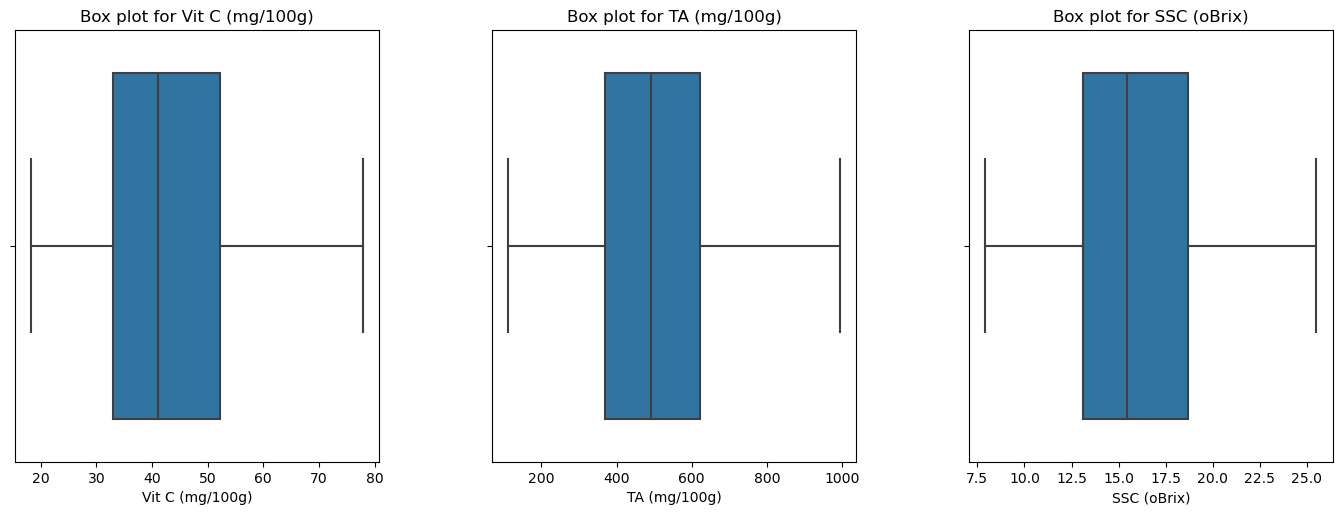

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size to give more space for each plot
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Adjust spacing between plots
fig.tight_layout(pad=5.0)
index = 0
# Create boxplots for each column in the dataframe
for i, v in enumerate(df_normalized.columns.values):
    if (v not in columns_scale): continue
    sns.boxplot(x=df_normalized[v], ax=ax[index])
    ax[index].set_title(f'Box plot for {v}')
    index += 1
    
# plt.savefig('./pics/box_plot.png', dpi = 600)


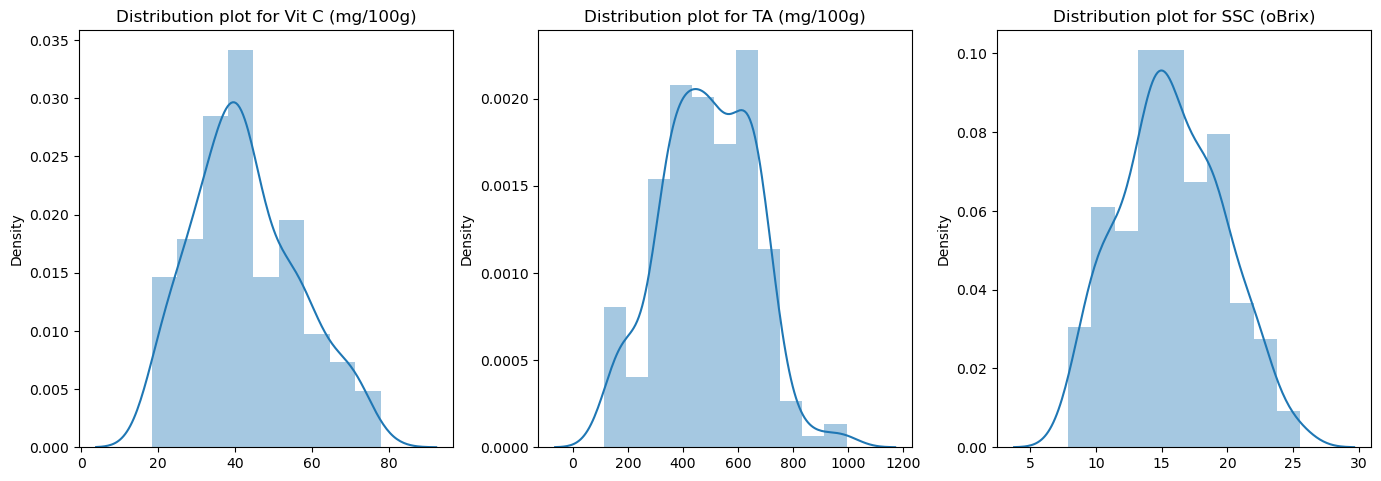

In [8]:
# plot distribution plot for numeric columns
plt.figure(figsize=(15, 6))
index = 0
for i, c in enumerate(df_normalized.select_dtypes(include='number').columns):
    if (c not in columns_scale): continue
    plt.subplot(1,3,index + 1)
    index += 1
    sns.distplot(df_normalized[c])
    plt.title('Distribution plot for ' + c)
    plt.xlabel('')
    plt.tight_layout(pad=5.0, w_pad=0.5, h_pad=1.0)

# plt.savefig('./pics/distribution_plot.png', dpi = 600)

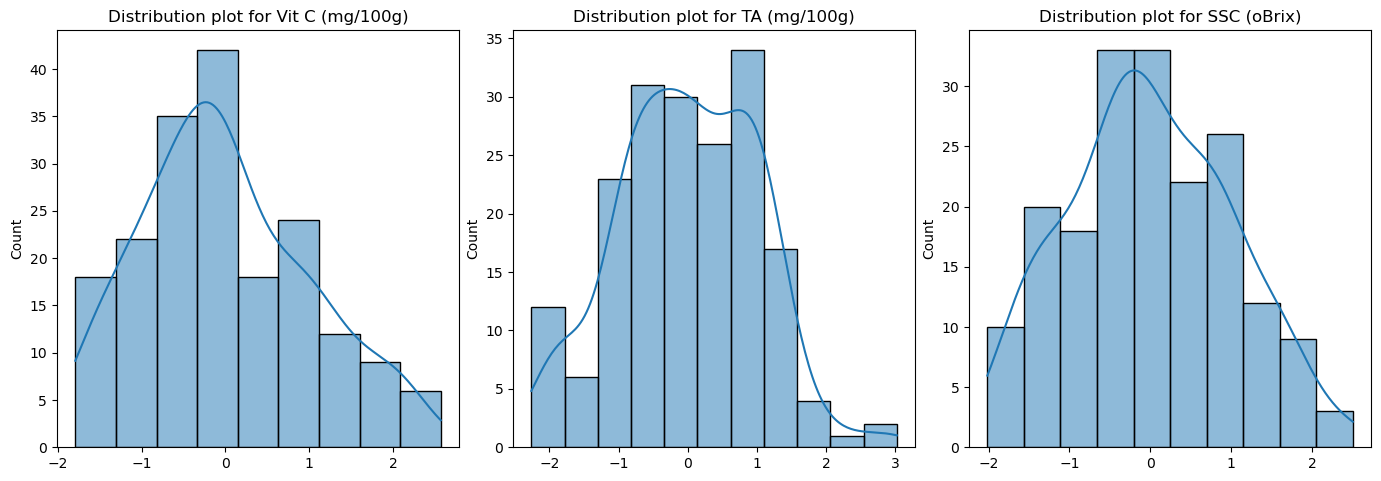

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Applying StandardScaler to numerical columns
scaler = StandardScaler()
df_normalized[columns_scale] = scaler.fit_transform(df_normalized[columns_scale].select_dtypes(include='float'))


# Plotting the distribution plots for scaled data
plt.figure(figsize=(15, 6))
index = 1
for i, c in enumerate(df_normalized.columns):
    if (c not in columns_scale): continue
    plt.subplot(1, 3, index)
    index += 1
    sns.histplot(df_normalized[c], kde=True)
    plt.title('Distribution plot for ' + c)
    plt.xlabel('')
    plt.tight_layout(pad=5.0, w_pad=0.5, h_pad=1.0)

# Save the plot
# plt.savefig('./pics/distribution_plot_scaled.png', dpi=600)

# Show the plot
plt.show()


## Encoding Mango Cultivars and Label

In [17]:
from sklearn.preprocessing import LabelEncoder

# Extract the 'label' and 'Mango Cultivars' columns
labels = df_normalized['label']
cultivars = df_normalized['Mango Cultivars']

# Ensure that 'label' and 'Mango Cultivars' columns have the same values
assert (labels == cultivars).all(), "The values in 'label' and 'Mango Cultivars' columns do not match."

# Encode the labels
label_encoder = LabelEncoder()
df_normalized['Mango Cultivars'] = label_encoder.fit_transform(labels)
df_normalized['label'] = label_encoder.fit_transform(labels)

# Create a dictionary mapping each label to its encoded index
label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}

# import ace_tools as tools; tools.display_dataframe_to_user(name="Encoded Mango Cultivars Data", dataframe=df_normalized)

# Display the label mapping
label_mapping

{'Cengkir': 0, 'Kent': 1, 'Kweni': 2, 'Palmer': 3}

In [19]:
df_normalized.head()

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,...,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,0,1.445468,0.660192,-1.813147,0.517039,0.516867,0.516921,0.516366,0.516205,...,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547,0
1,2,0,1.155470,-0.005213,-1.779768,0.465913,0.465593,0.465691,0.465959,0.465898,...,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989,0
2,3,0,1.414941,0.358137,-1.677065,0.550232,0.549902,0.549755,0.549763,0.549980,...,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563,0
3,4,0,1.430204,-0.150248,-1.743822,0.462931,0.462902,0.462700,0.462785,0.462643,...,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921,0
4,5,0,0.253366,-0.854085,-1.623146,0.449824,0.449643,0.449870,0.450019,0.449672,...,1.402181,1.404301,1.406622,1.408270,1.410406,1.411573,1.412805,1.414365,1.416021,0


## Smooth spectra data with MSC methods


In [21]:
# Function to apply MSC
def apply_msc(input_data):
    # Mean spectrum
    mean_spectrum = np.mean(input_data, axis=0)
    msc_data = np.zeros_like(input_data)
    
    # Apply MSC
    for i in range(input_data.shape[0]):
        fit = np.polyfit(mean_spectrum, input_data[i, :], 1, full=True)
        msc_data[i, :] = (input_data[i, :] - fit[0][1]) / fit[0][0]
        
    return msc_data

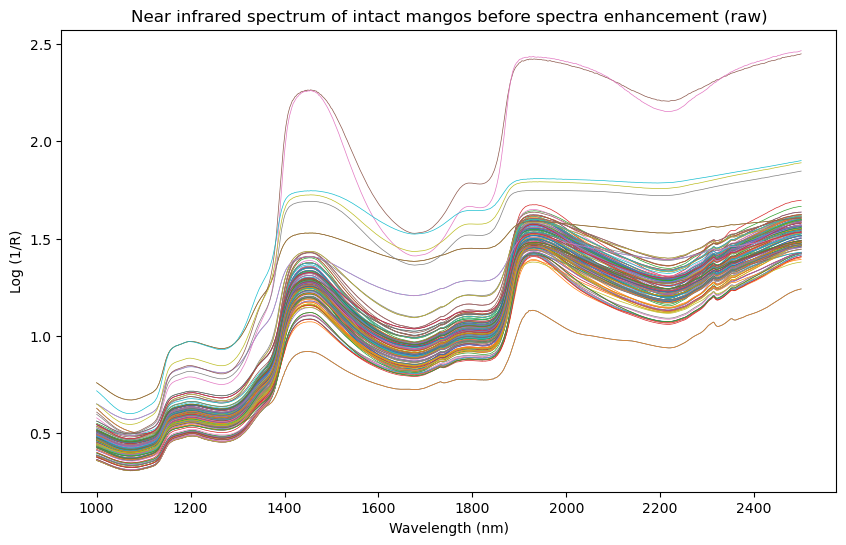

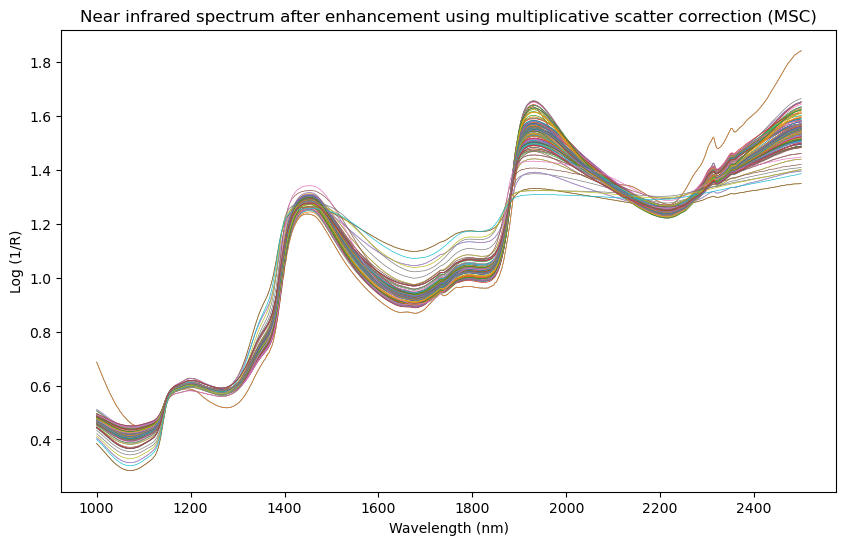

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Extracting wavelength columns
wavelengths = df_normalized.columns[5:-1].astype(float)
spectra = df_normalized.iloc[:, 5:-1].values

# Plotting raw spectra
plt.figure(figsize=(10, 6))
for i in range(spectra.shape[0]):
    plt.plot(wavelengths, spectra[i], linewidth=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Log (1/R)')
plt.title('Near infrared spectrum of intact mangos before spectra enhancement (raw)')
plt.savefig('./pics/spectro_raw.png', dpi = 600)
plt.show()

# Apply MSC to the spectra
msc_spectra = apply_msc(spectra)

# Plotting spectra after MSC
plt.figure(figsize=(10, 6))
for i in range(msc_spectra.shape[0]):
    plt.plot(wavelengths, msc_spectra[i], linewidth=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Log (1/R)')
plt.title('Near infrared spectrum after enhancement using multiplicative scatter correction (MSC)')
plt.savefig('./pics/spectro_msc.png', dpi = 600)
plt.show()


In [28]:
df_clean = df_normalized.copy()
# Replace the old spectra data with the new MSC-corrected spectra data
df_clean.iloc[:, 5:-1] = msc_spectra

# Display the updated dataframe to ensure the spectra data has been replaced
df_clean.head()

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,...,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,0,1.445468,0.660192,-1.813147,0.469598,0.469415,0.469473,0.468884,0.468714,...,1.517043,1.517959,1.519071,1.520086,1.520955,1.521592,1.522511,1.522965,1.523915,0
1,2,0,1.155470,-0.005213,-1.779768,0.489431,0.489033,0.489155,0.489488,0.489413,...,1.636442,1.638940,1.642106,1.644505,1.645994,1.647270,1.649017,1.650832,1.653113,0
2,3,0,1.414941,0.358137,-1.677065,0.507160,0.506768,0.506595,0.506604,0.506861,...,1.584002,1.585590,1.588076,1.589137,1.589258,1.589799,1.590307,1.591247,1.592532,0
3,4,0,1.430204,-0.150248,-1.743822,0.494381,0.494346,0.494098,0.494203,0.494028,...,1.635382,1.638232,1.641158,1.643456,1.645029,1.646566,1.648418,1.650019,1.651665,0
4,5,0,0.253366,-0.854085,-1.623146,0.483507,0.483291,0.483561,0.483739,0.483326,...,1.616303,1.618825,1.621586,1.623546,1.626087,1.627475,1.628940,1.630796,1.632766,0


In [29]:
df_clean.to_csv('./clean_data.csv')

# RQ: What are the ranges of spectral data that significantly impact the chemical attributes of mangoes?

### Detect outlier in wavelengths

In [39]:
import numpy as np

# Define a function to detect outliers using IQR
def detect_outliers(data_column):
    Q1 = np.percentile(data_column, 25)
    Q3 = np.percentile(data_column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_column < lower_bound) | (data_column > upper_bound)
    return outliers

wavelengths_str = df_normalized.columns[5:-1].astype(str)
# Loop through each wavelength column and detect outliers
outliers_info = []

for column in wavelengths_str:
    outliers = detect_outliers(df[column])
    if outliers.any():
        mango_nos = df[outliers]['No'].values
        for mango_no in mango_nos:
            outliers_info.append((mango_no, column))

In [1]:
# print(outliers_info)

In [56]:
def group_tuples(tuples_list):
    grouped_dict = {}
    
    # Group tuples by their first element (a)
    for a, b in tuples_list:
        if a not in grouped_dict:
            grouped_dict[a] = []
        grouped_dict[a].append(b)
    
    # Transform the dictionary into the desired format
    grouped_list = [(a, set(b_list)) for a, b_list in grouped_dict.items()]
    
    return grouped_list


grouped_tuples = group_tuples(outliers_info)

print(len(grouped_tuples))


23


In [62]:
# Create a DataFrame to display the result
grouped_df = pd.DataFrame(grouped_tuples, columns=['No', 'Outlier wavelengths'])

# Save the DataFrame to a CSV file
grouped_df.to_csv('grouped_outliers_info.csv', index=False)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Grouped Outliers Information", dataframe=grouped_df)

print(grouped_df.head())

print(f'\nNumber of mango have outlier wavelengths: {len(grouped_df)}')

    No                                Outlier wavelengths
0   11  {1510, 1865.3, 1000.7, 1434, 2113.1, 1970.2, 1...
1   12  {1510, 1865.3, 1000.7, 1434, 2113.1, 1970.2, 1...
2   99  {1510, 1130.2, 1148.2, 1434, 1517.1, 1299.6, 1...
3  100  {1123.4, 1168.4, 1109.9, 1865.3, 1000.7, 1130....
4  166  {1510, 1130.2, 1148.2, 1434, 1517.1, 1299.6, 1...

Number of mango have outlier wavelengths: 23


## Correlation of wavelengths with each attribute

In [3]:
df = pd.read_csv('clean_data.csv')

In [4]:
df_ssc = df.copy()
# No	Mango Cultivars	Vit C (mg/100g)	TA (mg/100g)
df_ssc.reset_index(drop=True, inplace=True)
df_ssc.drop(['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'TA (mg/100g)', 'label'], axis = 1, inplace = True)

# Display the first few rows to verify
df_ssc.head()

,SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,...,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2
0,-1.813147,0.469598,0.469415,0.469473,0.468884,0.468714,0.468135,0.467713,0.467139,0.466675,...,1.515857,1.517043,1.517959,1.519071,1.520086,1.520955,1.521592,1.522511,1.522965,1.523915
1,-1.779768,0.489431,0.489033,0.489155,0.489488,0.489413,0.488003,0.487505,0.487340,0.487405,...,1.633899,1.636442,1.638940,1.642106,1.644505,1.645994,1.647270,1.649017,1.650832,1.653113
2,-1.677065,0.507160,0.506768,0.506595,0.506604,0.506861,0.505919,0.504964,0.504301,0.503500,...,1.582991,1.584002,1.585590,1.588076,1.589137,1.589258,1.589799,1.590307,1.591247,1.592532
3,-1.743822,0.494381,0.494346,0.494098,0.494203,0.494028,0.492931,0.492315,0.492331,0.492507,...,1.632614,1.635382,1.638232,1.641158,1.643456,1.645029,1.646566,1.648418,1.650019,1.651665
4,-1.623146,0.483507,0.483291,0.483561,0.483739,0.483326,0.482336,0.482170,0.481445,0.480983,...,1.613748,1.616303,1.618825,1.621586,1.623546,1.626087,1.627475,1.628940,1.630796,1.632766


In [5]:
df_ssc = df.copy()
# Reset the index to ensure 'No' is not used as the index
df_ssc.reset_index(drop=True, inplace=True)

# Drop the unnecessary columns
df_ssc = df_ssc.drop(['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'TA (mg/100g)', 'SSC (oBrix)', 'label'], axis=1)

# Display the first few rows to verify
df_ssc.head()

,999.9,1000.3,1000.7,1001.1,1001.4,1001.8,1002.2,1002.6,1003,1003.4,...,2478.7,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2
0,0.469598,0.469415,0.469473,0.468884,0.468714,0.468135,0.467713,0.467139,0.466675,0.466121,...,1.515857,1.517043,1.517959,1.519071,1.520086,1.520955,1.521592,1.522511,1.522965,1.523915
1,0.489431,0.489033,0.489155,0.489488,0.489413,0.488003,0.487505,0.487340,0.487405,0.487112,...,1.633899,1.636442,1.638940,1.642106,1.644505,1.645994,1.647270,1.649017,1.650832,1.653113
2,0.507160,0.506768,0.506595,0.506604,0.506861,0.505919,0.504964,0.504301,0.503500,0.503070,...,1.582991,1.584002,1.585590,1.588076,1.589137,1.589258,1.589799,1.590307,1.591247,1.592532
3,0.494381,0.494346,0.494098,0.494203,0.494028,0.492931,0.492315,0.492331,0.492507,0.491879,...,1.632614,1.635382,1.638232,1.641158,1.643456,1.645029,1.646566,1.648418,1.650019,1.651665
4,0.483507,0.483291,0.483561,0.483739,0.483326,0.482336,0.482170,0.481445,0.480983,0.480886,...,1.613748,1.616303,1.618825,1.621586,1.623546,1.626087,1.627475,1.628940,1.630796,1.632766


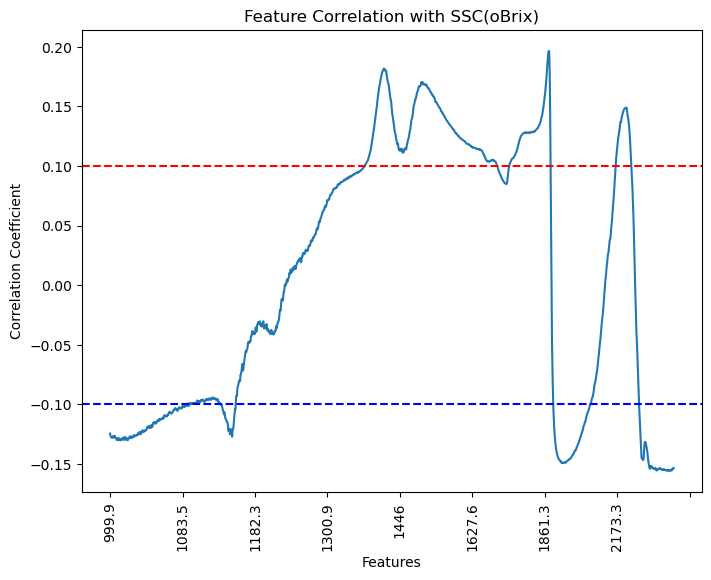

In [6]:
# Isolate the target correlations
df_ssc = df.copy()
# No	Mango Cultivars	Vit C (mg/100g)	TA (mg/100g)
# df_ssc.reset_index(drop=True, inplace=True)
df_ssc.drop(['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'TA (mg/100g)', 'label'], axis = 1, inplace = True)
corr_matrix_ssc = df_ssc.corr()
target_corr_ssc = corr_matrix_ssc['SSC (oBrix)']
# Plotting correlations with the target
plt.figure(figsize=(8, 6))
target_corr_ssc.drop('SSC (oBrix)').plot(kind='line')
plt.title('Feature Correlation with SSC(oBrix)')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')

# Add horizontal line at y = 0.1
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=-0.1, color='b', linestyle='--')

plt.show()

# plt.savefig('./pics/feature_correlation.png', dpi = 1000)

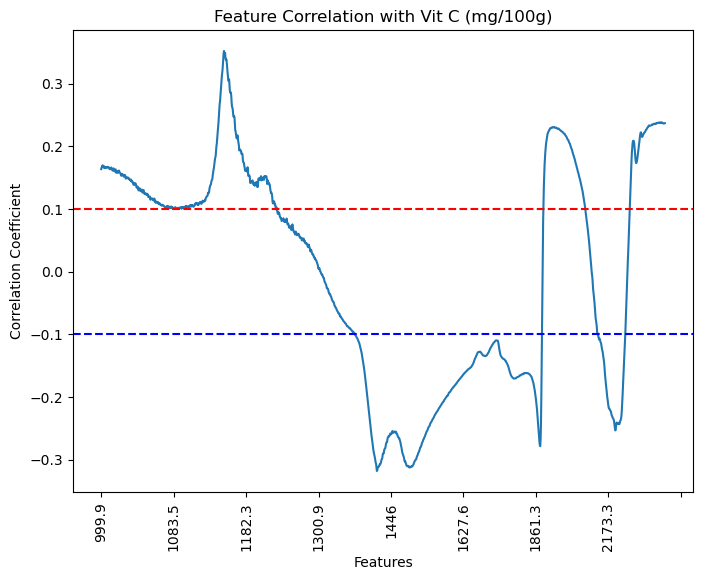

In [7]:
# Isolate the target correlations
df_C = df.copy()
# No	Mango Cultivars	Vit C (mg/100g)	TA (mg/100g)
# df_ssc.reset_index(drop=True, inplace=True)
df_C.drop(['No', 'Mango Cultivars', 'TA (mg/100g)', 'SSC (oBrix)', 'label'], axis=1, inplace=True)
corr_matrix_C = df_C.corr()
target_corr_C = corr_matrix_C['Vit C (mg/100g)']
# Plotting correlations with the target
plt.figure(figsize=(8, 6))
target_corr_C.drop('Vit C (mg/100g)').plot(kind='line')
plt.title('Feature Correlation with Vit C (mg/100g)')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')

# Add horizontal line at y = 0.1
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=-0.1, color='b', linestyle='--')

plt.show()


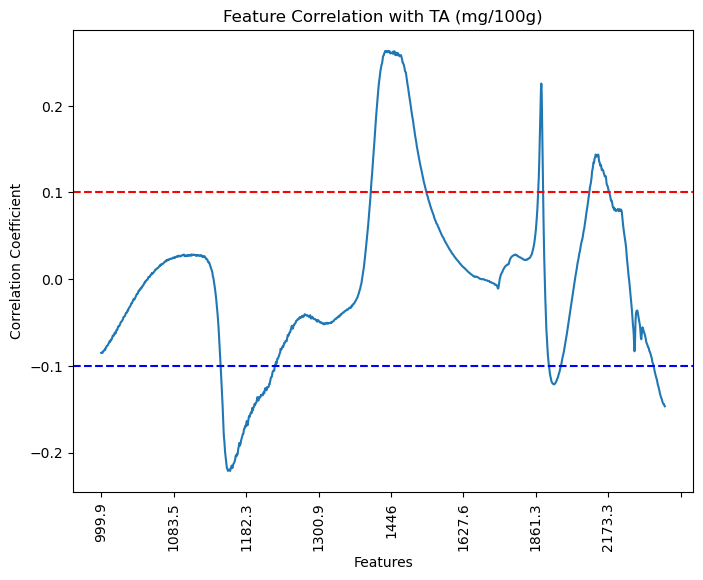

In [8]:
# Isolate the target correlations
df_TA = df.copy()
# No	Mango Cultivars	Vit C (mg/100g)	TA (mg/100g)
# df_ssc.reset_index(drop=True, inplace=True)
df_TA.drop(['No', 'Mango Cultivars', 'Vit C (mg/100g)', 'SSC (oBrix)', 'label'], axis=1, inplace=True)
corr_matrix_TA = df_TA.corr()
target_corr_TA = corr_matrix_TA['TA (mg/100g)']
# Plotting correlations with the target
plt.figure(figsize=(8, 6))
target_corr_TA.drop('TA (mg/100g)').plot(kind='line')
plt.title('Feature Correlation with TA (mg/100g)')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')

# Add horizontal line at y = 0.1
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=-0.1, color='b', linestyle='--')

plt.show()


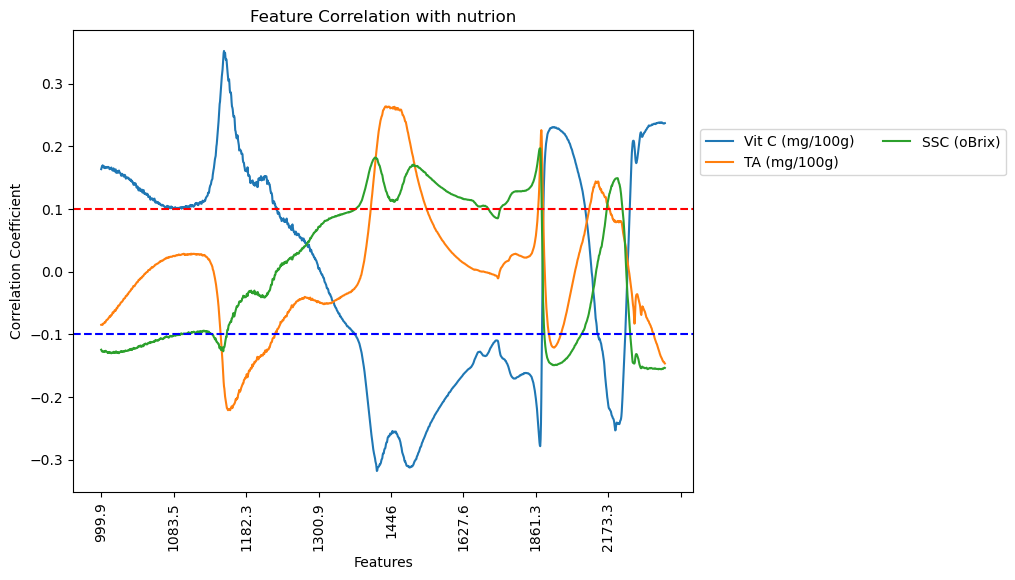

In [9]:
target_corr_TA = corr_matrix_TA['TA (mg/100g)']
# Plotting correlations with the target
plt.figure(figsize=(8, 6))
target_corr_C.drop('Vit C (mg/100g)').plot(kind='line')
target_corr_TA.drop('TA (mg/100g)').plot(kind='line')
target_corr_ssc.drop('SSC (oBrix)').plot(kind='line')
plt.title('Feature Correlation with nutrion')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')

# Function add a legend 
plt.legend(bbox_to_anchor=(1, 0.8), ncol=2) 

# Add horizontal line at y = 0.1
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=-0.1, color='b', linestyle='--')

plt.show()

## Filter wavelengths

In [10]:
# Extract the names of wavelengths where the absolute value of the correlation coefficient is >= 0.1
wavelengths_vit_c = target_corr_C[abs(target_corr_C) >= 0.1].index.tolist()
wavelengths_ta = target_corr_TA[abs(target_corr_TA) >= 0.1].index.tolist()
wavelengths_ssc = target_corr_ssc[abs(target_corr_ssc) >= 0.1].index.tolist()

# Remove target columns from the lists
wavelengths_vit_c.remove('Vit C (mg/100g)')
wavelengths_ta.remove('TA (mg/100g)')
wavelengths_ssc.remove('SSC (oBrix)')

# Display the results
# wavelengths_vit_c, wavelengths_ta, wavelengths_ssc

In [11]:
print(target_corr_C)

Vit C (mg/100g)    1.000000
999.9              0.163375
1000.3             0.165828
1000.7             0.167614
1001.1             0.167036
                     ...   
2490.6             0.236465
2493               0.236120
2495.4             0.236110
2497.8             0.236612
2500.2             0.236778
Name: Vit C (mg/100g), Length: 1558, dtype: float64


In [12]:
# Helper function to find continuous ranges
def find_continuous_ranges(wavelengths):
    ranges = []
    start = wavelengths[0]
    end = wavelengths[0]
    start_idx = df.columns.get_loc(wavelengths[0])
    end_idx = start_idx
    
    for i in range(1, len(wavelengths)):
        curr_wavelength = wavelengths[i]
        curr_idx = df.columns.get_loc(curr_wavelength)
        
        if curr_idx == end_idx + 1:
            end = curr_wavelength
            end_idx = curr_idx
        else:
            ranges.append(f"[{start_idx} -> {end_idx}, {start} -> {end}]")
            start = curr_wavelength
            end = curr_wavelength
            start_idx = curr_idx
            end_idx = curr_idx
    
    ranges.append(f"[{start_idx} -> {end_idx}, {start} -> {end}]")
    return ranges

In [13]:
df.columns.get_loc('999.9')

5

In [14]:

# Assuming the lists of wavelengths are sorted, if not sort them
wavelengths_vit_c = sorted(wavelengths_vit_c, key=lambda x: df.columns.get_loc(x))
wavelengths_ta = sorted(wavelengths_ta, key=lambda x: df.columns.get_loc(x))
wavelengths_ssc = sorted(wavelengths_ssc, key=lambda x: df.columns.get_loc(x))

# Get the continuous ranges
ranges_vit_c = find_continuous_ranges(wavelengths_vit_c)
ranges_ta = find_continuous_ranges(wavelengths_ta)
ranges_ssc = find_continuous_ranges(wavelengths_ssc)

In [15]:
# print(wavelengths_vit_c)

In [16]:
ranges_vit_c

['[5 -> 202, 999.9 -> 1082.1]',
 '[204 -> 214, 1083 -> 1087.6]',
 '[216 -> 486, 1088.5 -> 1227.6]',
 '[489 -> 490, 1229.4 -> 1229.9]',
 '[706 -> 1221, 1370.4 -> 1882.9]',
 '[1226 -> 1341, 1889.7 -> 2062.6]',
 '[1376 -> 1451, 2121.7 -> 2260.4]',
 '[1465 -> 1561, 2288.4 -> 2500.2]']

In [17]:
ranges_ta

['[335 -> 484, 1145.7 -> 1226.5]',
 '[749 -> 902, 1402.2 -> 1528.7]',
 '[1212 -> 1224, 1870.7 -> 1887]',
 '[1242 -> 1273, 1912 -> 1956.8]',
 '[1353 -> 1407, 2082.5 -> 2176.9]',
 '[1531 -> 1561, 2429.9 -> 2500.2]']

In [18]:
ranges_ssc

['[5 -> 218, 999.9 -> 1089.4]',
 '[220 -> 224, 1090.3 -> 1092.1]',
 '[312 -> 351, 1134.2 -> 1153.9]',
 '[708 -> 1073, 1371.8 -> 1700.2]',
 '[1107 -> 1221, 1738.9 -> 1882.9]',
 '[1229 -> 1330, 1893.9 -> 2044.7]',
 '[1401 -> 1443, 2166 -> 2244.8]',
 '[1466 -> 1561, 2290.4 -> 2500.2]']

## PCA methods to reduce dimension

### SSC

In [38]:
wavelengths_ssc = target_corr_ssc[abs(target_corr_ssc) >= 0.1].index.tolist()
wavelengths_ssc.remove('SSC (oBrix)')

# Extract the wavelength data (excluding metadata columns)
wavelength_data_ssc = df.iloc[:, 5:-1]  # Exclude first four columns and the last 'label' column

wavelength_ssc_final = wavelength_data_ssc[wavelengths_ssc]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wavelength_ssc_final)

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(standardized_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

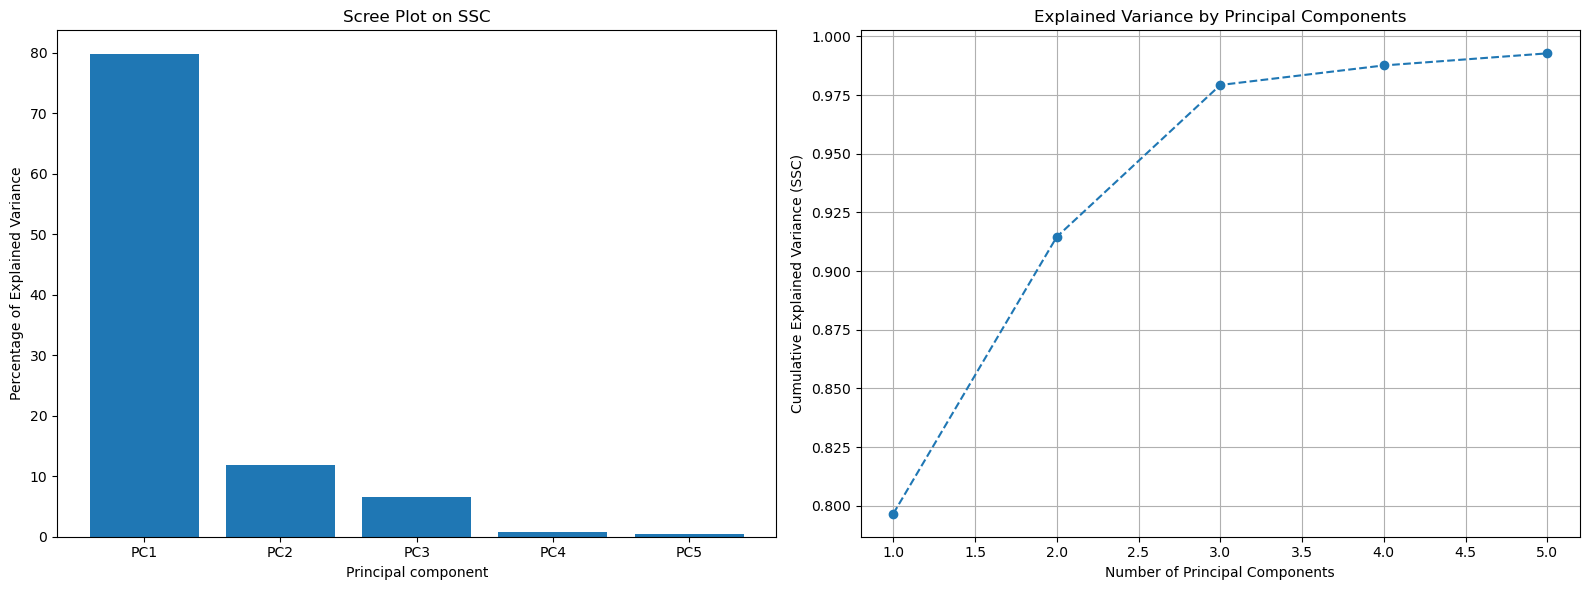

In [39]:
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
axes[0].set_ylabel('Percentage of Explained Variance')
axes[0].set_xlabel('Principal component')
axes[0].set_title('Scree Plot on SSC')

# Cumulative explained variance plot
axes[1].plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
axes[1].set_title('Explained Variance by Principal Components')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance (SSC)')
axes[1].grid()

plt.tight_layout()
plt.show()

### TA

In [40]:
wavelengths_TA = target_corr_TA[abs(target_corr_TA) >= 0.1].index.tolist()
wavelengths_TA.remove('TA (mg/100g)')

# Extract the wavelength data (excluding metadata columns)
wavelength_data_TA = df.iloc[:, 5:-1]  # Exclude first four columns and the last 'label' column

wavelength_TA_final = wavelength_data_TA[wavelengths_TA]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wavelength_TA_final)

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(standardized_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

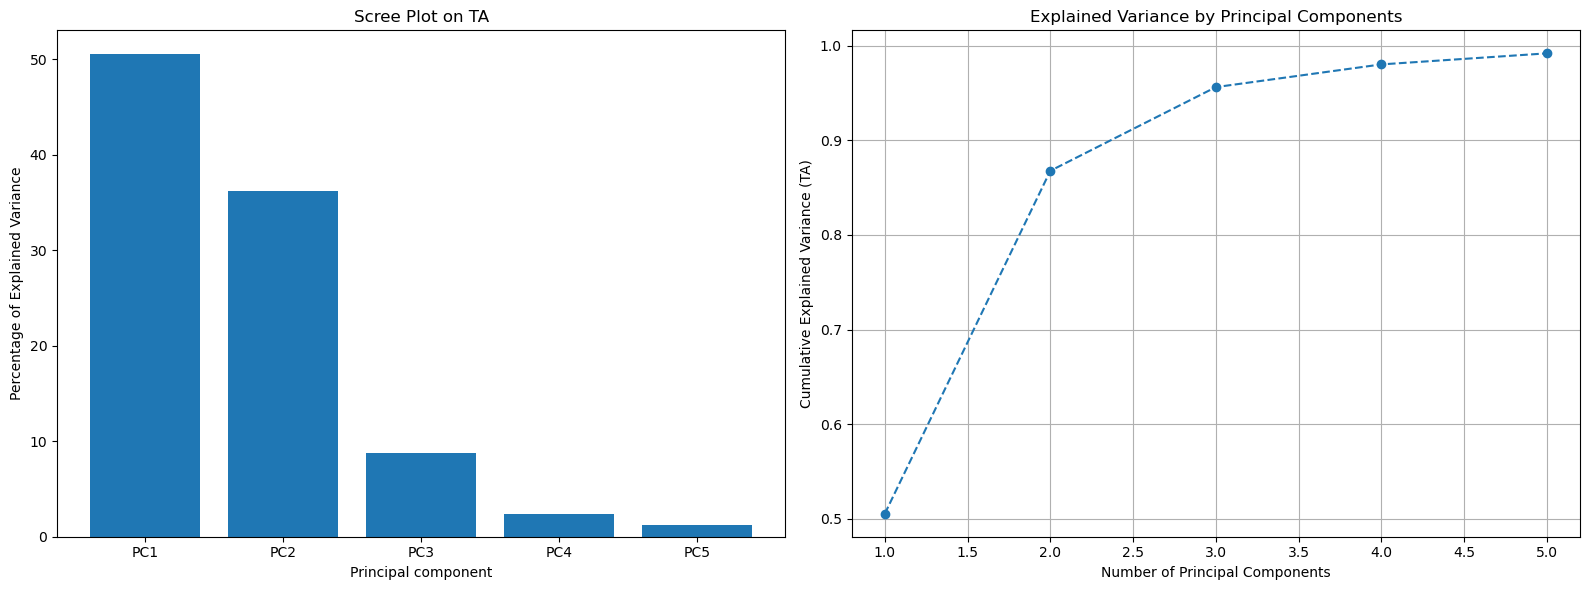

In [41]:
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
axes[0].set_ylabel('Percentage of Explained Variance')
axes[0].set_xlabel('Principal component')
axes[0].set_title('Scree Plot on TA')

# Cumulative explained variance plot
axes[1].plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
axes[1].set_title('Explained Variance by Principal Components')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance (TA)')
axes[1].grid()

plt.tight_layout()
plt.show()

### Vit C

In [42]:
wavelengths_C = target_corr_C[abs(target_corr_C) >= 0.1].index.tolist()
wavelengths_C.remove('Vit C (mg/100g)')

# Extract the wavelength data (excluding metadata columns)
wavelength_data_C = df.iloc[:, 5:-1]  # Exclude first four columns and the last 'label' column

wavelength_C_final = wavelength_data_C[wavelengths_C]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wavelength_C_final)

# Apply PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(standardized_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# plt.bar(x = range(1, len(per_var) + 1), height=per_var, tick_label=labels)
# plt.ylabel('Percentage of Explained Variance')
# plt.xlabel('Principal component')
# plt.title('Scree Plot on TA')
# plt.show()

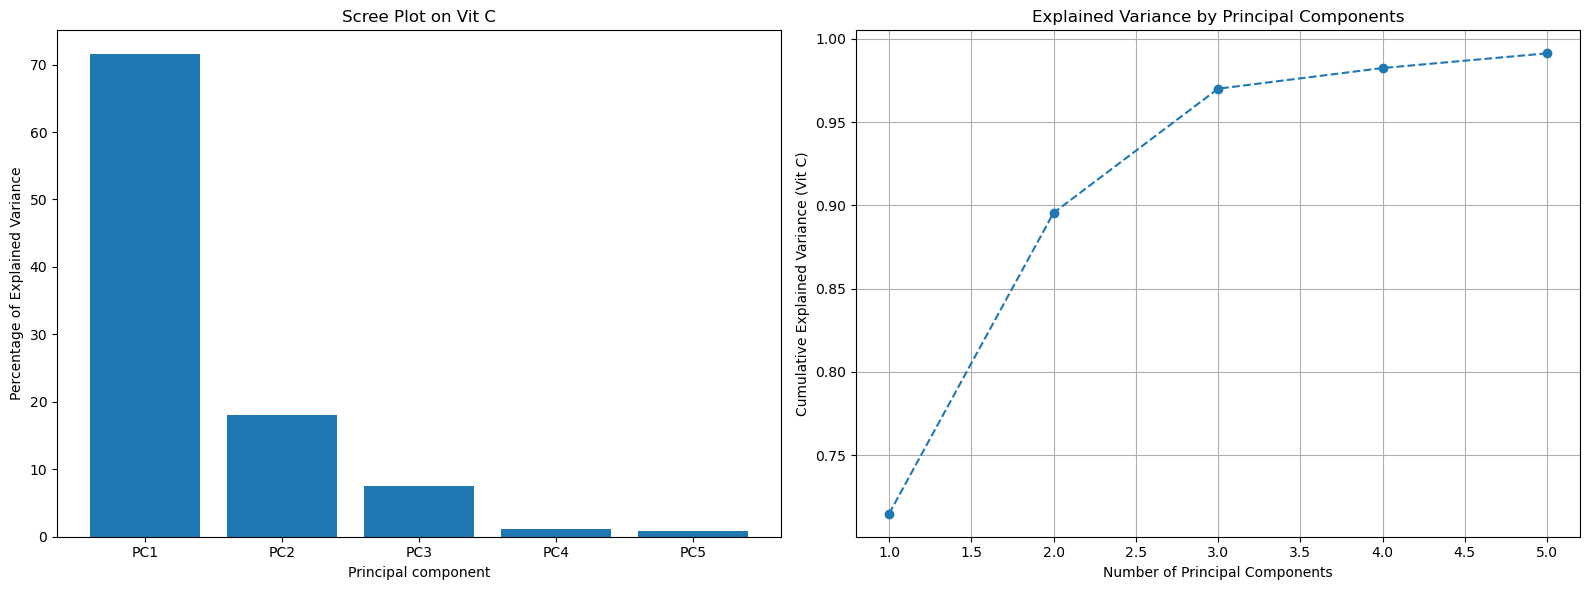

In [43]:
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
axes[0].set_ylabel('Percentage of Explained Variance')
axes[0].set_xlabel('Principal component')
axes[0].set_title('Scree Plot on Vit C')

# Cumulative explained variance plot
axes[1].plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
axes[1].set_title('Explained Variance by Principal Components')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Explained Variance (Vit C)')
axes[1].grid()

plt.tight_layout()
plt.show()

## Model Development

**N-componnents selected: 3**

### SSC

In [49]:
wavelengths_ssc = target_corr_ssc[abs(target_corr_ssc) >= 0.1].index.tolist()
wavelengths_ssc.remove('SSC (oBrix)')

# Extract the wavelength data (excluding metadata columns)
wavelength_data_ssc = df.iloc[:, 5:-1]  # Exclude first four columns and the last 'label' column

wavelength_ssc_final = wavelength_data_ssc[wavelengths_ssc]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wavelength_ssc_final)

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(standardized_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

In [50]:
import statsmodels.api as sm
principal_components_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

nutrition_data = df['SSC (oBrix)']

# Add a constant term for the intercept
X = sm.add_constant(principal_components_df)
y = nutrition_data

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [51]:
# Print the summary of the model
model_summary = model.summary()
print(model_summary)

# Extract the coefficients and p-values
coefficients = model.params
p_values = model.pvalues
r_squared = model.rsquared

# Display the results
print("Coefficients:\n", coefficients)
print("P-values:\n", p_values)
print("R-squared:\n", r_squared)

                            OLS Regression Results                            
Dep. Variable:            SSC (oBrix)   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.868
Date:                Mon, 27 May 2024   Prob (F-statistic):              0.137
Time:                        14:12:24   Log-Likelihood:                -261.10
No. Observations:                 186   AIC:                             530.2
Df Residuals:                     182   BIC:                             543.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.556e-16      0.073   4.87e-15      1.0

### TA

In [52]:
wavelengths_TA = target_corr_TA[abs(target_corr_TA) >= 0.1].index.tolist()
wavelengths_TA.remove('TA (mg/100g)')

# Extract the wavelength data (excluding metadata columns)
wavelength_data_TA = df.iloc[:, 5:-1]  # Exclude first four columns and the last 'label' column

wavelength_TA_final = wavelength_data_TA[wavelengths_TA]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wavelength_TA_final)

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(standardized_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

In [53]:
import statsmodels.api as sm

principal_components_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

nutrition_data = df['TA (mg/100g)']

# Add a constant term for the intercept
X = sm.add_constant(principal_components_df)
y = nutrition_data

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [54]:
# Print the summary of the model
model_summary = model.summary()
print(model_summary)

# Extract the coefficients and p-values
coefficients = model.params
p_values = model.pvalues
r_squared = model.rsquared

# Display the results
print("Coefficients:\n", coefficients)
print("P-values:\n", p_values)
print("R-squared:\n", r_squared)

                            OLS Regression Results                            
Dep. Variable:           TA (mg/100g)   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.557
Date:                Mon, 27 May 2024   Prob (F-statistic):            0.00419
Time:                        14:12:31   Log-Likelihood:                -257.19
No. Observations:                 186   AIC:                             522.4
Df Residuals:                     182   BIC:                             535.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.956e-16      0.071  -2.74e-15      1.0

### Vit C

In [55]:
wavelengths_C = target_corr_C[abs(target_corr_C) >= 0.1].index.tolist()
wavelengths_C.remove('Vit C (mg/100g)')

# Extract the wavelength data (excluding metadata columns)
wavelength_data_C = df.iloc[:, 5:-1]  # Exclude first four columns and the last 'label' column

wavelength_C_final = wavelength_data_C[wavelengths_C]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wavelength_C_final)

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(standardized_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

In [56]:
import statsmodels.api as sm

principal_components_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

nutrition_data = df['Vit C (mg/100g)']

# Add a constant term for the intercept
X = sm.add_constant(principal_components_df)
y = nutrition_data

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [57]:
# Print the summary of the model
model_summary = model.summary()
print(model_summary)

# Extract the coefficients and p-values
coefficients = model.params
p_values = model.pvalues
r_squared = model.rsquared

# Display the results
print("Coefficients:\n", coefficients)
print("P-values:\n", p_values)
print("R-squared:\n", r_squared)

                            OLS Regression Results                            
Dep. Variable:        Vit C (mg/100g)   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     7.680
Date:                Mon, 27 May 2024   Prob (F-statistic):           7.34e-05
Time:                        14:12:39   Log-Likelihood:                -252.84
No. Observations:                 186   AIC:                             513.7
Df Residuals:                     182   BIC:                             526.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.286e-17      0.070  -1.04e-15      1.0

# RQ: Does one quality attribute significantly differ based on its cultivator?

In [5]:
# Load the dataset
data = pd.read_csv('Dataset_RawSpectrum_NIRS_for_Intact_Mangoes - Copy.csv')
# data.reset_index(inplace=True)
data.head()

,No,Mango Cultivars,Vit C (mg/100g),TA (mg/100g),SSC (oBrix),999.9,1000.3,1000.7,1001.1,1001.4,...,2481.1,2483.5,2485.8,2488.2,2490.6,2493,2495.4,2497.8,2500.2,label
0,1,Cengkir,62.51267,599.6819,8.695,0.517039,0.516867,0.516921,0.516366,0.516205,...,1.505065,1.505929,1.506978,1.507936,1.508755,1.509356,1.510223,1.510651,1.511547,Cengkir
1,2,Cengkir,58.55433,488.5819,8.825,0.465913,0.465593,0.465691,0.465959,0.465898,...,1.388579,1.390588,1.393135,1.395065,1.396263,1.397289,1.398694,1.400154,1.401989,Cengkir
2,3,Cengkir,62.09600,549.2490,9.225,0.550232,0.549902,0.549755,0.549763,0.549980,...,1.459362,1.460702,1.462801,1.463697,1.463799,1.464256,1.464685,1.465478,1.466563,Cengkir
3,4,Cengkir,62.30433,464.3660,8.965,0.462931,0.462902,0.462700,0.462785,0.462643,...,1.393639,1.395964,1.398350,1.400225,1.401508,1.402762,1.404272,1.405578,1.406921,Cengkir
4,5,Cengkir,46.24100,346.8490,9.435,0.449824,0.449643,0.449870,0.450019,0.449672,...,1.402181,1.404301,1.406622,1.408270,1.410406,1.411573,1.412805,1.414365,1.416021,Cengkir


In [9]:
# Define the cultivar dictionary
cultivar_dict = {'Cengkir': 0, 'Kent': 1, 'Kweni': 2, 'Palmer': 3}
inverse_cultivar_dict = {v: k for k, v in cultivar_dict.items()}

# # Map the cultivar names to the dataset
# data['Cultivar Name'] = data['Mango Cultivars'].map(inverse_cultivar_dict)

# Display the first few rows to ensure the mapping is correct
print(data.head())

   No Mango Cultivars  Vit C (mg/100g)  TA (mg/100g)  SSC (oBrix)     999.9  \
0   1         Cengkir         62.51267      599.6819        8.695  0.517039   
1   2         Cengkir         58.55433      488.5819        8.825  0.465913   
2   3         Cengkir         62.09600      549.2490        9.225  0.550232   
3   4         Cengkir         62.30433      464.3660        8.965  0.462931   
4   5         Cengkir         46.24100      346.8490        9.435  0.449824   

     1000.3    1000.7    1001.1    1001.4  ...    2481.1    2483.5    2485.8  \
0  0.516867  0.516921  0.516366  0.516205  ...  1.505065  1.505929  1.506978   
1  0.465593  0.465691  0.465959  0.465898  ...  1.388579  1.390588  1.393135   
2  0.549902  0.549755  0.549763  0.549980  ...  1.459362  1.460702  1.462801   
3  0.462902  0.462700  0.462785  0.462643  ...  1.393639  1.395964  1.398350   
4  0.449643  0.449870  0.450019  0.449672  ...  1.402181  1.404301  1.406622   

     2488.2    2490.6      2493    2495.4   

In [13]:
import pandas as pd

# Assuming your data is in a DataFrame called 'data'
# If not, you might need to read it from a file or other source

# Identify relevant columns
quality_attributes = ["Vit C (mg/100g)", "TA (mg/100g)", "SSC (oBrix)"]

# Calculate descriptive statistics for each cultivar
descriptive_stats = data.groupby('Mango Cultivars')[quality_attributes].agg(['mean', 'std'])

# Calculate the sample size for each cultivar
sample_size = data.groupby('Mango Cultivars').size()

# Add the sample size to the descriptive statistics DataFrame
descriptive_stats['Sample Size'] = sample_size

In [14]:
descriptive_stats

Vit C (mg/100g)            TA (mg/100g)              \
                           mean        std         mean         std   
Mango Cultivars                                                       
Cengkir               56.358479   8.694842   356.678611  126.454980   
Kent                  34.785617   8.189979   503.299378  166.576168   
Kweni                 50.247129  15.729357   534.330245  151.142047   
Palmer                46.836643  13.423378   487.812598  171.056745   

                SSC (oBrix)           Sample Size  
                       mean       std              
Mango Cultivars                                    
Cengkir           13.492000  4.481432          18  
Kent              16.440082  3.550438          85  
Kweni             14.501034  3.619713          29  
Palmer            16.110237  4.051006          54

### ANOVA Test

In [16]:
from scipy.stats import f_oneway
data = pd.read_csv('Dataset_RawSpectrum_NIRS_for_Intact_Mangoes - Copy.csv')
# Perform ANOVA for each quality attribute
anova_results = {}
for attribute in quality_attributes:
    groups = [group[attribute].values for name, group in data.groupby('Mango Cultivars')]
    f_stat, p_value = f_oneway(*groups)
    anova_results[attribute] = {'F-statistic': f_stat, 'p-value': p_value}

print(anova_results)


{'Vit C (mg/100g)': {'F-statistic': 29.18783366050596, 'p-value': 1.8653187126248226e-15}, 'TA (mg/100g)': {'F-statistic': 4.963745919131001, 'p-value': 0.0024627671226466587}, 'SSC (oBrix)': {'F-statistic': 4.24448142438362, 'p-value': 0.0063009611050179526}}


In [17]:
# Example of ANOVA results interpretation
for attribute, result in anova_results.items():
    f_stat = result['F-statistic']
    p_value = result['p-value']
    print(f"ANOVA results for {attribute}:")
    print(f"  F-statistic: {f_stat}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  Conclusion: Significant differences exist between the cultivars.\n")
    else:
        print("  Conclusion: No significant differences exist between the cultivars.\n")


ANOVA results for Vit C (mg/100g):
  F-statistic: 29.18783366050596
  p-value: 1.8653187126248226e-15
  Conclusion: Significant differences exist between the cultivars.

ANOVA results for TA (mg/100g):
  F-statistic: 4.963745919131001
  p-value: 0.0024627671226466587
  Conclusion: Significant differences exist between the cultivars.

ANOVA results for SSC (oBrix):
  F-statistic: 4.24448142438362
  p-value: 0.0063009611050179526
  Conclusion: Significant differences exist between the cultivars.



### Tukey hsd

In [19]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # Define the cultivar dictionary
# cultivar_dict = {'Cengkir': 0, 'Kent': 1, 'Kweni': 2, 'Palmer': 3}
# inverse_cultivar_dict = {v: k for k, v in cultivar_dict.items()}

# # Map the cultivar names to the dataset
# data['Cultivar Name'] = data['Mango Cultivars'].map(inverse_cultivar_dict)

# Identify relevant columns
quality_attributes = ["Vit C (mg/100g)", "TA (mg/100g)", "SSC (oBrix)"]

# Perform Tukey's HSD post-hoc test for each quality attribute
post_hoc_results = {}

for attribute in quality_attributes:
    tukey = pairwise_tukeyhsd(data[attribute], data['Mango Cultivars'], alpha=0.05)
    post_hoc_results[attribute] = tukey.summary()

# Display the results
for attribute, result in post_hoc_results.items():
    print(f"Tukey's HSD results for {attribute}:\n{result}\n")


Tukey's HSD results for Vit C (mg/100g):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
Cengkir   Kent -21.5729    0.0 -29.2008 -13.9449   True
Cengkir  Kweni  -6.1114 0.2784  -14.933   2.7103  False
Cengkir Palmer  -9.5218 0.0125 -17.5233  -1.5204   True
   Kent  Kweni  15.4615    0.0   9.1392  21.7839   True
   Kent Palmer   12.051    0.0    6.935  17.1671   True
  Kweni Palmer  -3.4105 0.5599 -10.1788   3.3578  False
-------------------------------------------------------

Tukey's HSD results for TA (mg/100g):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1 group2 meandiff p-adj    lower    upper   reject
--------------------------------------------------------
Cengkir   Kent 146.6208 0.0035    37.443 255.7986   True
Cengkir  Kweni 177.6516 0.0019   51.3889 303.9143   True
Cengkir Palmer  131.134 0.0177   16.6105 245.6575   True
   Kent  Kweni  31